<a href="https://colab.research.google.com/github/nyatefe/bestpoint-consulting/blob/main/Linear_models_and_mixed_effects_models_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This notebook contains materials developed by the School of Collective Intelligence for an introductory workshop on linear models and mixed effects models; the content is available on [GitHub](https://github.com/School-of-Collective-Intelligence/Stats_workshop).*

*The text is released under released under the [MIT license](https://opensource.org/licenses/MIT).*


## Linear models and mixed effects models in R

Install dependencies and load libraries


In [1]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### 1. Core definitions

1.1. Linear models and linear mixed models are a very useful tool for understanding the relationships between variables in a given system.

1.2. Linear models describe a continuous response variable as a function of one or more predictor variables. They can help you understand and predict the behaviour of complex systems or analyse experimental, social and biological data.

1.3. Linear regression is a statistical method used to create a linear model. The model describes the relationship between a dependent variable y (also called response) as a function of one or more independent variables X<sub>i</sub> (called predictors).

The general equation for a linear model is:

y=β<sub>0</sub>+∑ β<sub>i</sub>X<sub>i</sub>+ϵ<sub>i</sub>

where  β  represents linear parameter estimates to be computed and  ϵ  represents the error terms.

1.4. Mixed models are models that incorporate both fixed and random effects.

1.5. A fixed effect is a parameter that does not vary, i.e. the linear model of the total population. Fixed effects models assume that the independent variable has a fixed or constant relationship with the dependent variable across all observations. That is, the group means are fixed (non-random).

1.6. In contrast, random effects are parameters that are themselves random variables. Random effect models assist in controlling for unobserved heterogeneity, i.e. the heterogeneity introduced into the model by having repeated measurements of different individuals.



image.png

Image from Steve Midway, Data analysis with R. https://bookdown.org/steve_midway/DAR/random-effects.html

### 2. What does the linear model do?

2.1. Suppose we know nothing about academia, and we are interested in whether the quality of scientific publications produced by people with a PhD is of higher or lower quality than scientific publications produced by undergraduate students.  

2.2. To do this, we take a group of PhDs and a group of undergraduates and ask them to write a paper. Then, we measure the respective quality of the papers as the inverse function of the errors found in the paper by the scientific community. That is, if a paper contains many errors the quality is lower, if it contains few errors, the quality is higher.

2.3. The data of such a study might look like the following:


| Subject | Rank     | Quality  |
| --------|:--------:| -----:   |
| 1       | PhD      |   0.932  |
| 2       | PhD      |   0.816  |
| 3       | PhD      |   0.968  |
| 4       | Undergrad|   0.52   |
| 5       | Undergrad|   0.448  |
| 6       | Undergrad|   0.568  |

2.4. Looking at this normalised data (values between 0 and 1) it seems quite obvious that PhDs produce higher quality scientific papers than undergraduates. The quality values of the papers of the undergraduates seem to be about 0.4 quality points below the quality values of the PhDs.

2.5. However, note that the sample is very small (only six datapoints), and you might have been unlucky and collected data from undergraduates with exceptionally low quality papers. This is why, in general, we want our data sample to be large and representative of the population. But this is not always possible.

2.6. Although the example seems intuitive enough, we might want a more precise estimate of the difference between PhDs and undergraduates. And we might also want an estimate about how likely (or unlikely) that difference in quality could have arisen just because of drawing an unlucky sample.

2.7. This is where the linear model comes in. In this case, its task is to give you some values about quality for PhDs and undergraduates. I will also give you some probability value as to how likely those values are.

### 3. Our first model

3.1. The fundamental idea underlying the linear model is to express the relationship of interest. In our case, the one between academic rank and quality. This is expressed with the following formula:

**quality ~ rank**

3.2 The above formula reads "quality predicted by rank" or "quality as a function of rank."

3.3. The term on the left (the thing you mesure) is called "dependent variable", "predicted variable" or "response variable".

3.4. The term on the right is called "independent variable", "explanatory variable" or "predictor". We can also call this term "fixed effect". Fixed effects models assume that the independent variable has a fixed or constant relationship with the dependent variable across all observations. That is, the group means are fixed (non-random).



3.5. But things are not as deterministic as the above model suggests. Quality is not completely detemined by Rank, but potentially also by other factors such as age, personality, socioeconomic class, and what not. And even if we could measured all these factors, there will allways be other factors we cannot control for.

3.6. It may also be that some subjects in our study were going through an unusually stressful time during the study, or that they simply tried less hard or were less motivated. We can not control all this stuff, so we will update our formula by adding these "random" factors.


**quality	~	rank +	ε**

3.7. This	“ε”	(“epsilon”)	is	an	error	term.	It	stands	for	all	of	the	things	that	affect quality that are not rank.

3.8. Note that the formula on the right conceptually divides the world into things that you can understand (the rank, deterministic, "fixed effect") and things you can't understand (the random part "ε").

### 4. Let's go with our first model in R

4.1. The first step is to get the dataset. In R, we can import existing data or create a data frame by defining vectors, that is, sequences of data with the same datatype. In R, a vector can be created using c() function.

4.2. Please type in the following vectors:

quality={0.932,0.816,0.968,0.52,0.448,0.568}, using numeric datatype.

rank={phd, phd, phd, undergrad, undergrad, undergrad}, using character datatype.

In [ ]:
quality <- c(...,...,...,...,...,...)
rank <- c(rep("...",3),rep("...",3))

###### Solution to 4.2.

In [2]:
quality <- c(0.932,0.816,0.968,0.52,0.448,0.568)
rank <- c(rep("phd",3),rep("undergrad",3))

###### 4.3. Let’s	combine	these	two	objects	into	a	data	frame:


In [ ]:
df <- data.frame(...,...)

###### Solution to 4.3

In [3]:
df <- data.frame(quality,rank)

###### 4.4. We have now a dataframe object. Type it to see it:

In [4]:
View(df)

quality rank     
1 0.932   phd      
2 0.816   phd      
3 0.968   phd      
4 0.520   undergrad
5 0.448   undergrad
6 0.568   undergrad

In [5]:
df

quality rank     
1 0.932   phd      
2 0.816   phd      
3 0.968   phd      
4 0.520   undergrad
5 0.448   undergrad
6 0.568   undergrad

###### 4.5. Let's proceed with the linear model. We take our formula above and feed it into the lm() function. We omit the “ε” term because the linear model function doesn’t need you to specify this.

In [ ]:
xmdl = lm(... ~ ..., df)

###### Solution to 4.5

In [6]:
xmdl <- lm(quality ~ rank, df)

###### 4.6. We modeled quality as a function of rank, taken from the data frame df and we saved this model into an object that we named xmdl. Now, you can see what the model did by using the function sumary():

In [7]:
summary(xmdl)


Call:
lm(formula = quality ~ rank, data = df)

Residuals:
       1        2        3        4        5        6 
 0.02667 -0.08933  0.06267  0.00800 -0.06400  0.05600 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.90533    0.04074  22.224 2.43e-05 ***
rankundergrad -0.39333    0.05761  -6.827  0.00241 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07056 on 4 degrees of freedom
Multiple R-squared:  0.921,	Adjusted R-squared:  0.9012 
F-statistic: 46.61 on 1 and 4 DF,  p-value: 0.002407


### 5. Interpreting our linear model

##### 5.1. R-squared


Breaking down the summary

5.1.1. First,	you’re being reminded	of the model formula that you entered.

5.1.2. Then, the model gives you the residuals.

5.1.3. After that, we have the coefficients of the fixed effects.

5.1.4. Then, the output	prints some	overall	results	of the model that you constructed.

5.1.5. We	have	to	work	through	this	output.	Let’s	start	with “Multiple	R-Squared”. This refers	to	the	statistic	R<sup>2</sup> which is	a	measure	of “variance explained”	or	if	you	prefer	less	causal	language,	it	is	a	measure	of	“variance	accounted	for”.

5.1.6. The formula for R<sup>2</sup> is as follows:

R<sup>2</sup>=1 - $\frac{SSE_{model}}{SSE_{null}}$

where $SSE_{model}$ stands for the sum of squared errors of the linear model, and $SSE_{null}$ stands for the sum of squared errors of the null model.

5.1.7. What is the SSE of a model?

The sum of squared errors of a model is the sum of the squared differences between each observation and its group's line.


![SSE](https://camilo-mora.github.io/GEO380/images/test.gif "SEE")

Animation from Camilo Mora, The least squares line. https://camilo-mora.github.io/GEO380/the-least-squares-line.html

###### 5.1.8. What is the SSE of a null model?

The sum of squared errors of a null model is the sum of the squared differences between each observation and a line without slope.

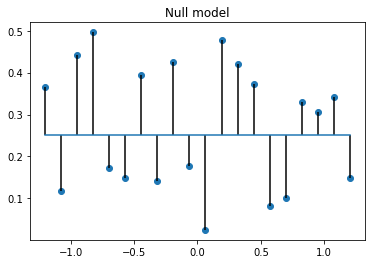

5.1.9. Therefore, if a linear model is perfect, i.e. all observations fall on the linear model line, we would have $SSE_{model}$ equals 0. There is no error. In this case we would have that R<sup>2</sup>=1 - $\frac{0}{x}$= 1. That is, our model would explain 100\% of the variance of the observed data. This never happens.

5.1.10. R<sup>2</sup> values	range	from	0	to	1.	Our	R<sup>2</sup> is	0.921,	which	is	quite	high	… you	can	interpret	this	as	showing	that	92.1%	of	the	stuff	that’s	happening	in	our	dataset	is	“explained” by	our	model.	 In	 this	case,	because	we	have	only	one	 thing	in	our	model	doing	 the	explaining	(the	fixed	effect	“rank”),	the	R<sup>2</sup> reflects	how	much	variance in our	data	is	accounted	for	by	differences	between	PhDs	and	undergraduates.

5.11. In	general,	you	want	R<sup>2</sup> values	to	be	high,	but	what	is	considered	a	high	R<sup>2</sup> value	depends	on	your	field and	on	your	phenomenon	of	study.	If	the	system	you	study	is	 very	 deterministic,	R<sup>2</sup> values	 can	 approach	 1.	 But	in	most of	cognitive scince,  biology and the  social sciences,	where	we	study	complex	or	messy	systems	that	are	affected	by	a	whole	 bunch	 of	 different	 phenomena,	 we	 frequently	 deal	 with	 much	 lower R<sup>2</sup> values.

5.1.12. The	“Adjusted	R-squared”	value	is	a	slightly	different	R<sup>2</sup> value	that	not	only	looks	at	how	much	variance	is	“explained”,	but	also	at	how	many	fixed	effects	you	used to	do	the	explaining.	So,	in	the	case of	our	model	above,	the	two	values	are	quite	similar	 to	each	other,	but	in	some	cases	 the	adjusted	R<sup>2</sup>adj can	be	much	lower	if	you	have	a	lot	of	fixed	effects	(say,	you	also	used	age,	psychological	traits, etc.	to	predict	quality).

##### 5.2. Significance

P-values have been commonly misused and misinterpreted by researchers. This is partly because the 0.05 significance level (alpha level) is a convention often used as the boundary between a statistically significant and a statistically non-significant p-value. A convention so popular and simple to apply that has led people to mistakenly think that there are non-arbitrary reasons to consider results on opposite sides of a threshold as qualitatively different.

If	 you’ve	 already	 done	 research,	 your	 eyes	 will	probably	immediately	jump	to	the	p-value,	which	in	many	fields	is	your	ticket	for	publishing	 your	 work.	 There’s	an	 obsession	 with	 p-values and	even	 though	 they	 are	 regarded	 as	 so	 important, they	 are	 quite	 often	misunderstood.

###### 5.2.1 What	exactly	does	the	p-value	mean	here?

Technically	speaking,	the	p-value	is	a	conditional	probability: If the null hypothesis is true, p-value represents the probability of obtaining test results at least as extreme as the results actually observed.

In	our	case,	the	null	hypothesis is	“rank	has	no	effect	on	quality”.	And, our p-value	shows	that	if	this hypothesis is true,	then	the	data we observed	would	be	quite	unlikely.	Thus, we	interpret it	as	showing	that	 the	 null	 hypothesis	 “rank	 has no effect on	 quality”	is	quite	unlikely	 and	 hence	 our	result	is	“statistically	significant”.

###### 5.2.2. How is p-value calculated?

1. The t-distribution is a distribution that captures the probability of particular t-values if the null hypothesis of equal means were true.

image.png

2. The bell-shaped curve of this distribution essentially states that, under the null hypothesis of equal means (e.g. same quality mean for PhDs and undergraduates), very large or very small t-values are very improbable.

3. In contrast, t-values closer to zero are much more probable under the null hypothesis of equal group means.

4. Thus, in the absence of any group difference, most randomly drawn samples are going to yiled t-values closer to 0.

5. One way to think about this is to draw random samples from a distribution in which the null hypothesis is actually true. If you draw lots of samples, most selected samples will have t-values that are close to 0. Very rarely will random sampling produce extreme t-values.

6. So, in summary:
* You define a population of interest, such as the population of all PhDs and undergraduates.
* You sample from this population of interest.
* When testing a difference between two groups, you state the null hypothesis μ1 = μ2 for the population.
* You compute a t-value from your sample.
* Finally, if your t-value is close to 0 (i.e. high p-value), you accept the null hypothesis of equal means. If your t-value is extreme (i.e. low p-value) you act as if the null hypothesis is not true.



###### 5.2.3. Gauging Intuitions About t and Significance

Let's generate some random data to gauge your intuitions about t
and significance tests. The following performs a t-test for 10 participants. The group difference is specified to be 2, and the standard deviation is 2 as well.

Run this entire batch of code multiple times. What t-values do you get? How often does the t-test become significant? Repeat this for different values for n, meandiff, and sd. This will show you how the three ingredients impact the test statistic and the resultant p.

In [ ]:
# Set values:
n <- 10; meandiff <- 2; my_sd <- 2
# Perform t-test:
t.test( rnorm(n, sd = my_sd),
rnorm(n, sd = my_sd) + meandiff)

Note that in the above code we are simulating two samples that actually have different means. Therefore, every time we obtain, by chance, a p-value greater than 0.005 and accept the null hypothesis of equal means, we will be incurring a type II error.

image.png

###### 5.2.4. Common Misinterpretations of p-Values

*   p-value does no represent the probability of the null hypothesis being true.
*   p-value does not represent the strength of an effect.
*   p-value does not represent evidence in support of the alternative hypothesis.

P-value only measures incompatibility with the null hypothesis. If the null hypothesis is true, p-value represents the probability of obtaining test results at least as extreme as the results actually observed.




### 6. Reporting results

In [ ]:
summary(xmdl)

6.1. When reporting the output of your linear models,	you	have	to	distinguish	between	the	significance	of	the	overall	model	(the	p-value	at	the	very	bottom	of	the	output), which	considers	all	effects	together,	 from	 the	 p-value	 of	 individual	 coefficients	 (which	 you	 find	 in	 the coefficients	 table above	 the	overall	significance). We’ll	 talk	more	about	 this	in a	bit.

6.2. Note	that	the	p-value	for	the	overall	model	was	p=0.002407,	which	is	the	same	as	the	p-value	on	the	right-hand	side	of	the	coefficients	table	in	the	row	that	starts	with	 “rankundergrad”.	 This	 is	 because	 your	 model	 had	 only	 one	 fixed	 effect	 (namely,	“rank”)	and	so the	significance	of	the	overall	model	is	the	same	as	the	significance	for	 this	coefficient. If	 you	had	multiple	 fixed	effects,	 then	 the	significance	 of	 the	overall	model	and	 the	 significance	 of	 this	coefficient	would	be	different.	That	is	because	 the	 significance	 of	 the	 overall	 model	 takes	 all	 fixed	 effects	 (all	explanatory variables)	into	account	whereas	 the	coefficients	 table	looks	at	each fixed	effect	individually.

6.3. At the bottom of the summary table we have the F-statistic. F-statistic is calculated from

$F = \frac{\frac{SSE1-SSE2}{p2-p1}}{\frac{SSE2}{N-p2}}$, where p2 is the number of parameters of model 2 (in our case two levels in "rank"), p1 is the number of parameters of model 1, and N is the number of observations.


6.4. For	a	 general	 linear model	analysis,	if	you	wanted	to	 say	 that	 your	 result	 is	 “significant”,	 you	 would	 have	 to	 write	 something	 like	 this:

“We	 constructed	a	linear	model	of quality	as	a	 function	 of	 rank.	This	model	was	significant	(F(1,4)=46.61,	p<0.01).	(…)”

where, F is reported with its degrees of freedom between models (p2-p2=2-1=1) and within model2 (N-p2=6-2=4).


### 7. Intercepts and slopes

7.1. But	why	does	it	say	“rankundergrad” rather	than	just	“rank”,	which	is	how	we	named	our	fixed	effect?	And	where	did	the	PhDs	go?	If	you	look	at	the	estimate	in	the	row	that	starts	with	“(Intercept)”,	you’ll	see	that	the	value	is	0.90533.	This	looks	like	it	 could	 be	 the	 estimated	 mean	 of	 the	PhDs	paper	 quality.	 If	 you	 type	 the	following…

In [8]:
mean(df[df$rank=="phd",]$quality)

[1] 0.9053333

…	you’ll	get	the	mean	of	PhDs	quality values,	and	you’ll	see	that	this	value	is very	similar	to	the	estimate	value	in	the	“(Intercept)”	column.

7.2. Next,	note	that	the	estimate	for	“rankundergrad”	is	negative.	If	you	subtract	the	estimate	in	 the	 first	 row	 from	 the	 second,	 you’ll	 get 0.512,	which	is	 the mean	 of	 the	undergraduate	paper	 qualitites	 (you	 can	 verify	 that	 by	 repeating	 the	 above	 command	 and	exchanging	“undergrad”	for	“phd”).

In [9]:
mean(df[df$rank=="undergrad",]$quality)

[1] 0.512

7.3. To	sum	up,	the	estimate	for	“(Intercept)”	is	the	estimate	for	the	PhDs	category,	and	 the	 estimate	 for	 “rankundergrad”	 is	 the	 estimate	 for	 the	 difference	 between	 the PhD	 and	 the	 undergraduate	 category.	 This	 may	 seem	 like	 a	 very	 roundabout	 way	 of	showing	a	difference	between	two	categories,	so	let’s	unpack	this	further.


7.4. Let's plot a picture	of	the	way	the	linear	model	sees	your	data:

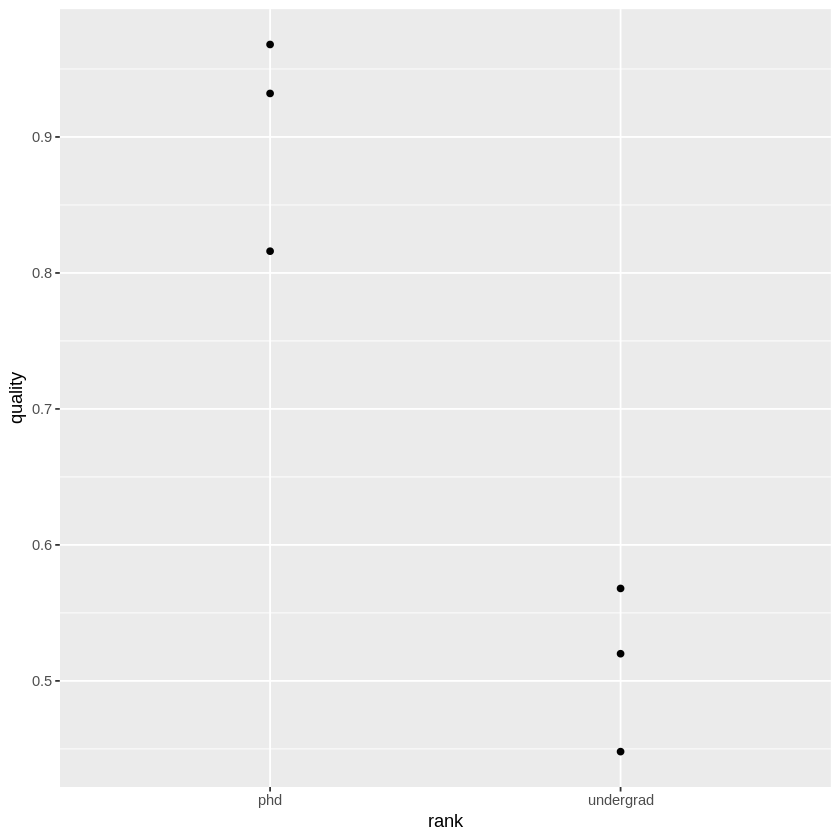

In [10]:
ggplot(df, aes(x=rank, y=quality)) +  geom_point()


In [11]:
ggplot(df,aes(rank, quality)) +
geom_point() +
stat_summary(geom = "line", fun = mean, group = 1) +
theme_bw()


The	linear	model	imagines	the	difference	between	undergrads	and	PhDs	as	a	slope.	So,	to	go	“from	PhDs	to	undergrads”,	you	have	to	go	down	-0.39333	…	which	is	exactly	the	coefficient	 that	we’ve	seen	above.	The	internal	coordinate	system	looks	like this:

7.5. In summary:
* The	estimate for the	intercept	(0.90533) is	the	estimate	for	PhDs	paper	quality!
*	The estimate for "rankundergrad" (-0.39333) is the slope, that is, the difference between PhDs and undergrads.


7.6.	Why	 did	 the	model	 choose	 phd	 to	 be	 the	intercept
rather	than	undergrads?	And	what	is	 the	 basis	 for	 choosing	 one	 reference	level	 over	the	other?	The	lm() function	simply	takes	whatever	comes	first	in	the	alphabet!	“p”	comes	before	“u”,	making	“phd”	the	intercept	at	x=0 and	“undergrads”	the	slope	of	going	from	0	to	1.

**That is, the intercept is the mean value of y (the response variable, quality) when x=0 (in our case, when the predictor is phd).**

**And the slope is the mean change in the value of the response variable (quality), per unit change of the predictor variable (in our case, when you jump from phd to undergrads).**


### 8. Linear model with a continuous independent variable

8.1. If	 you	 had	 a	continuous	 variable,	 say	 age,	 you	 could	 also	 fit	 a	 line.	 Everything	 would	 work	exactly	the	same.	The	data	might	look	something	like	this:


| Subject | Age      | Quality  |
| --------|:--------:| -----:   |
| 1       | 14       |   0.2    |
| 2       | 23       |   0.45   |
| 3       | 35       |   0.7    |
| 4       | 48       |   0.89   |
| 5       | 52       |   0.96   |
| 6       | 67       |   0.92   |

8.2. Let’s	construct	the	data	in	R:


In [12]:
age = c(14,23,35,48,52,67)
quality = c(0.2,0.45,0.7,0.89,0.96,0.92)
df2 = data.frame(age,quality)


8.3. Let's plot our variables by using the plot() function.

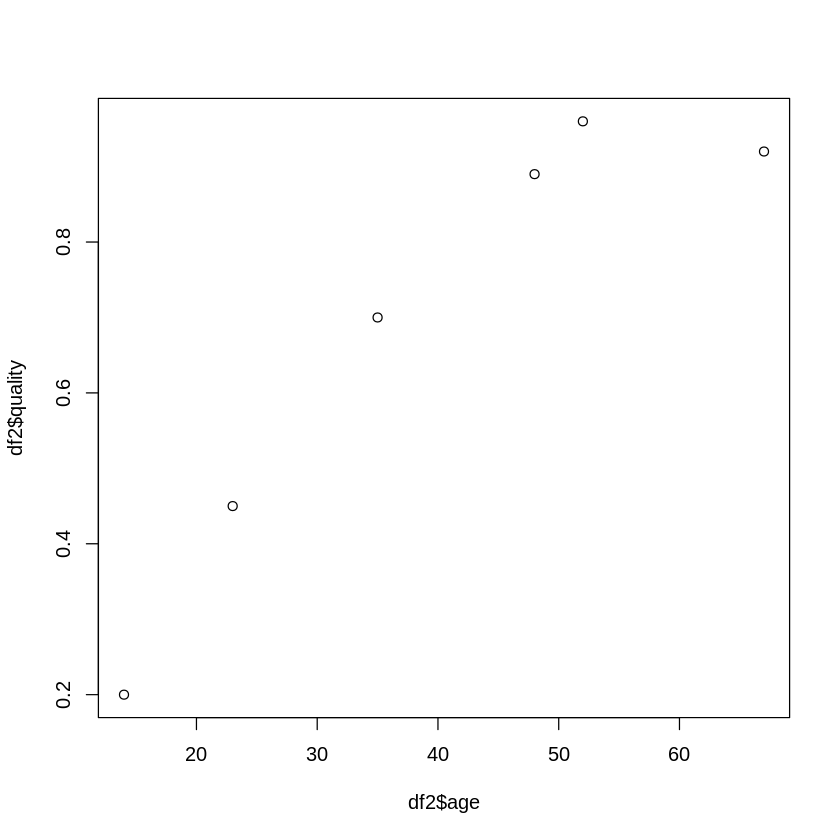

In [13]:
plot(df2$age, df2$quality)

8.4. Let's build the linear model **quality	~	age	+	ε**. We	express	this	as	a	function,	where	our	“fixed	effect”	is	now	“age”.

In [14]:
xmdl2 = lm(quality ~ age, df2)
summary(xmdl2)


Call:
lm(formula = quality ~ age, data = df2)

Residuals:
        1         2         3         4         5         6 
-0.113725  0.006347  0.083110  0.085436  0.097690 -0.158857 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.111614   0.123843   0.901  0.41841   
age         0.014436   0.002835   5.092  0.00702 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1245 on 4 degrees of freedom
Multiple R-squared:  0.8663,	Adjusted R-squared:  0.8329 
F-statistic: 25.93 on 1 and 4 DF,  p-value: 0.007023


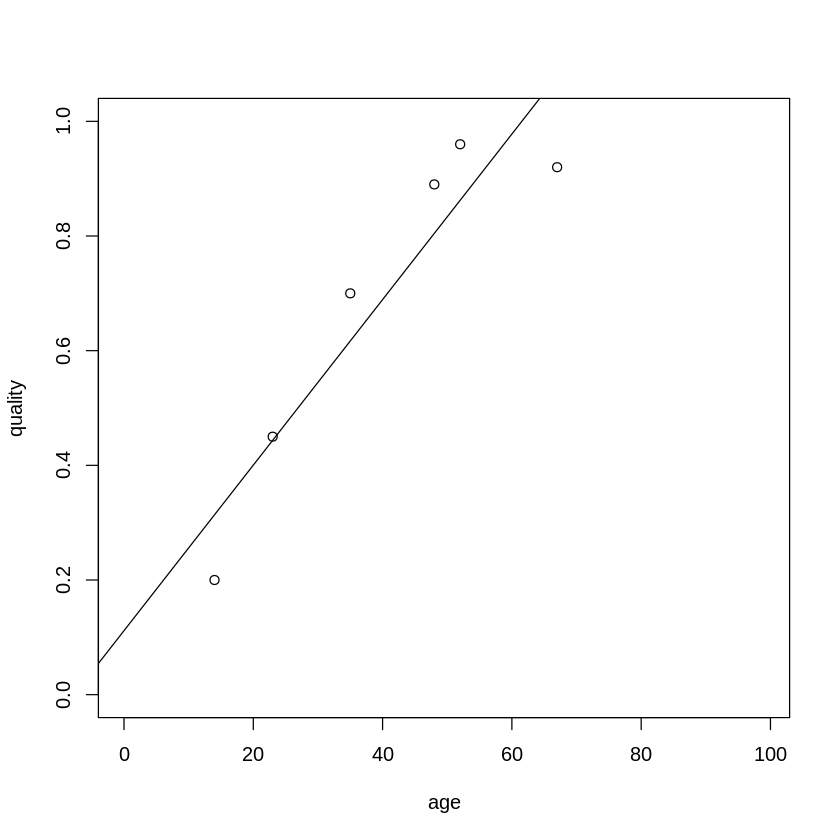

In [15]:
plot(quality ~ age, df2,  xlim = c(0,99), ylim = c(0,1))
abline(lm(quality~age, df2))

8.5. Interpreting our model:

* About 83% of the observed variation is explained by our linear model.
* The	intercept	 (0.11)	here	is	 the	predicted	quality	 value	 for	 people	 with	 age	 0.	 This	 intercept	 doesn’t	 make	 much	 sense because	people	who	are	not	born	yet	can't really produce a research paper.
* The slope is 0.014, which means that for	 every increase	of	age	by 1	you	increase quality 0.014 quality units.	Easy-peasy:	just	go	one	 step	 to	 the	 right	in	 your	 graph	 (in	 your	 unit	 of	measurement,	 here:	 age	in years)	and	one	step	down	(in	your	unit	of	measurement,	here: normalised quality units).
* Reporting: We constructed a linear model of quality as a function of age. The model was statistically significant (R2adj. = 0.8329, F(1, 4) = 25.93, p < 0.01). Increasing age by 1 year increased quality by about 0.014  $\pm$ 0.003 ($SE$).

8.6. Meaningful intercepts

The intercept of our study makes no sense at all. What newborn baby could produce a research paper? In cases like this, it makes sense to perform linear transformations of our data to make the intercept more meaningful. For example, we can centre the data by subtracting the mean age.

In [16]:
df2$age.c = df2$age - mean(df2$age)
xmdl3 = lm(quality ~ age.c, df2)
summary(xmdl3)


Call:
lm(formula = quality ~ age.c, data = df2)

Residuals:
        1         2         3         4         5         6 
-0.113725  0.006347  0.083110  0.085436  0.097690 -0.158857 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.686667   0.050810  13.514 0.000173 ***
age.c       0.014436   0.002835   5.092 0.007023 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1245 on 4 degrees of freedom
Multiple R-squared:  0.8663,	Adjusted R-squared:  0.8329 
F-statistic: 25.93 on 1 and 4 DF,  p-value: 0.007023


Note	that	while	the	estimate	has	changed	from 0.11	(predicted	quality	at	age	 0)	 to	 0.68	 (predicted	 quality	 at	 average	 age),	 the	 slope	 hasn’t	changed	 and	 neither	 did	 the	 significance	 associated	 with	 the	 slope	 or	 the	significance	associated	with	the	full	model.

You	just	changed	the	metric	so	that	the	intercept	is	now	the	mean quality.	So,	via	centering	our	variable	we	made	the	intercept	more	meaningful.

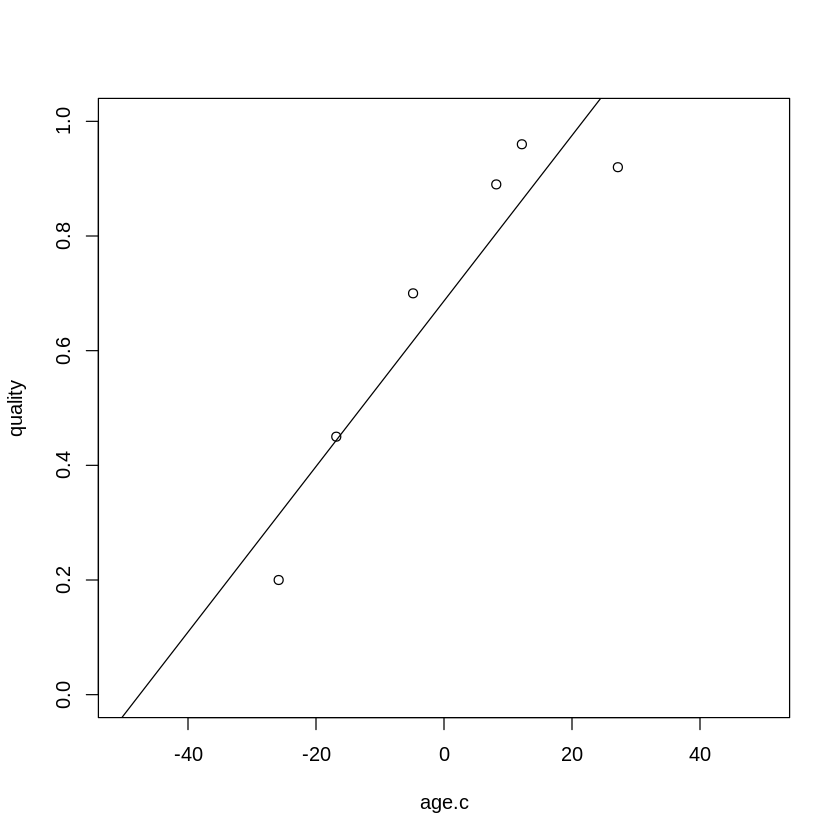

In [17]:
plot(quality ~ age.c, df2,  xlim = c(-50,50), ylim = c(0,1))
abline(lm(quality~age.c, df2))

### 9. Multiple linear regression

The examples we have worked on so far are quite simple. But things can scale up to	more	 complicated	 stuff.	For example, say	 you	measured	 two	 factors	 (“age”	and “rank”). You	could	put	them	in	the	same	model.	Your	formula	would	then	be:

**quality	~ rank	+	age	+	ε**

Or,	you	could	add	dialect	as	an	additional	factor:

**quality	~ speed	+	sex	+	age	+	ε**

Or, you can even add an interaction between factors.

**quality	~ sex	+	age	+ sex:age +	ε**
or
**quality	~ sex*age +	ε**

The	only	thing	that	changes	is	the	following.	The	p-value	at the	bottom	of	the	output	will	be	the	p-value	for	the	overall	model.	This means	that	the	 p-value	 considers	 how	 well	 all	 of	 your	 fixed	 effects	 together	 help	 in	accounting	 for	 variation	in	 quality.	The	 coefficient	 output	will	 then	 have	 p-values	for	the	individual	fixed	effects.

This	is	what	people	sometimes	call	 “multiple	regression”,	where	you	model	one	response	variable	as	a	function	of	multiple	predictor	variables. The	linear	model	is	just	another	word	for	multiple	regression.

### 10. Assumptions

Like	any	other	model,	the	linear	 model	 has	 assumptions.

In order  for the linear model to be meaningful, there are some conditions that have to be satisfied.

10.1. Linearity

The	dependent variable must be a linear combination of the independent varaibles. If	it	doesn’t,	the	residual	plot	will	indicate	some	kind	of	curve.


In [ ]:
plot(fitted(xmdl3), residuals(xmdl3))

In	 this	 case…	 there	 isn’t	 any	 obvious	 pattern	 in	 the	 residuals, but we cant really tell because our sample has only 6 datapoints.	 If	 there	 were	 a	nonlinear	 or	 curvy	 pattern,	 then	 this	would	indicate a	 violation	 of	 the	linearity	assumption.	Here’s	an	example	of	a	residual	plot	that	clearly	shows	a	violation	of	linearity:

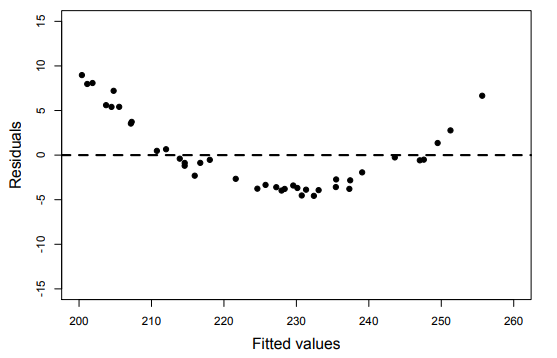

10.2. Homoskedasticity

The	variance of	your	data	should	be	approximately	equal	across	the	range	of	your	predicted	 values.

For	 the	 homoscedasticity	 assumption	 to	 be	 met,	 the	 residuals of	 your	 model	need	 to	roughly	have	a	similar	amount	of	deviation	 from	your	predicted	values.

A	good residual	plot	essentially	looks	blob-like. Let's produce some:

In [ ]:
plot(rnorm(100),rnorm(100))

A bad residual plot might (unequal error deviations) look like this:

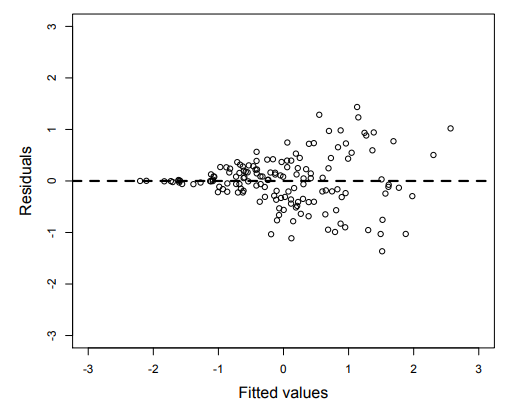

10.3. Independence:

The	 data	 points	 should	 come	 from	different	subjects.	And	each	subject	should	only	contribute	one	data	point.

The	ideal	case	is	a	coin	flip:	Each	coin	flip	is	absolutely	independent	from	the	outcome	of	the	preceding	coin	flips.	The	same	should	hold	for	your	data	points	when	 you	 run	 a	 linear	 model	 analysis.

When	you	violate	the	independence	assumption, because you have repeated measurements, then you will need to use mixed models to control for random effects.

###  11. Mixed effects models

11.1. Imagine we are interested in the relationship between quality
and speed of publications in academia. In this case, we would be interested in a relationship that looks like this:

**quality ~ speed + ε**


11.2. In our study, we might want to treat speed as a categorical factor with two levels: *fast* and *slow*, as indicators of people that publish research at a fast rate vs. people that uses a slow science strategy.

11.3. We might also had an additional fixed effect, rank, and so our formula looks more like this:

**quality ~ speed + rank + ε**

11.4. Now, imagine that in our present study our design was so that we took multiple measures per subject. That is, each subject wrote multiple papers, some of them in a hurry (fast), and some of them in no hurry at all (slow). So, we can observe that this represents a violation of the independence assumption because we have repeated responses from the same subjet.

11.5. The linear models above consider only fixed effects and a general error term "ε". That is, in the linear model we have a set of structured effects that we know about (the fixed effects) and a set of unstructured effects that we do not control for.

11.6. In the mixed model, we add one or more random effects to our fixed effects. These random effects essentially structure the error term "ε". In the case of our model, we add a random effect for the "subject", and this characterises the idiosyncratic variation. the idiosyncratic variation that is due to individual differences.

**quality ~ speed + rank + (1|subject) + ε**

"(1|subject)" here means that our model assumes a different intercept for each subject. That is, a different baseline quality level for each subject.

11.7. Now, consider that there was another source of non-independence. In our experiment we asked people to write papers for a number of different topics: politics, language, maths, etc... In total, there were 7 different topics. Since there might be "something" about writting about maths (or whatever) that leads to overall higher quality, we need to add this sorce of potential by-topic variation to our model (i.e. different intercepts for different topics).

**quality ~ speed + rank + (1|subject) + (1|topic) + ε**


11.8. Let's translate this into R:

11.9. Install and load packages.

In [18]:
#We need to install the R package lme4 (Bates, Maechler & Bolker, 2012).
install.packages("lme4")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’




In [19]:
#Load lme4
library(lme4)

Loading required package: Matrix



11.10. Download data

Download the speed_data.csv file from https://github.com/School-of-Collective-Intelligence/Stats_workshop

11.11. If you are using google colab, upload the csv file to your google colab content directory.

11.12. Read the csv and familiarise yourself with the dataframe.

In [20]:
#Read the CSV file available in your current working directory
df_speed <- read.csv('speed_data.csv')

In [21]:
head(df_speed)

subject rank topic speed value quality  
1 phd1    phd  1     fast  213.3 0.6993443
2 phd1    phd  1     slow  204.5 0.6704918
3 phd1    phd  2     fast  285.1 0.9347541
4 phd1    phd  2     slow  259.7 0.8514754
5 phd1    phd  3     fast  203.9 0.6685246
6 phd1    phd  3     slow  286.9 0.9406557

In [22]:
#Check for missing values
which(!complete.cases(df_speed))

integer(0)

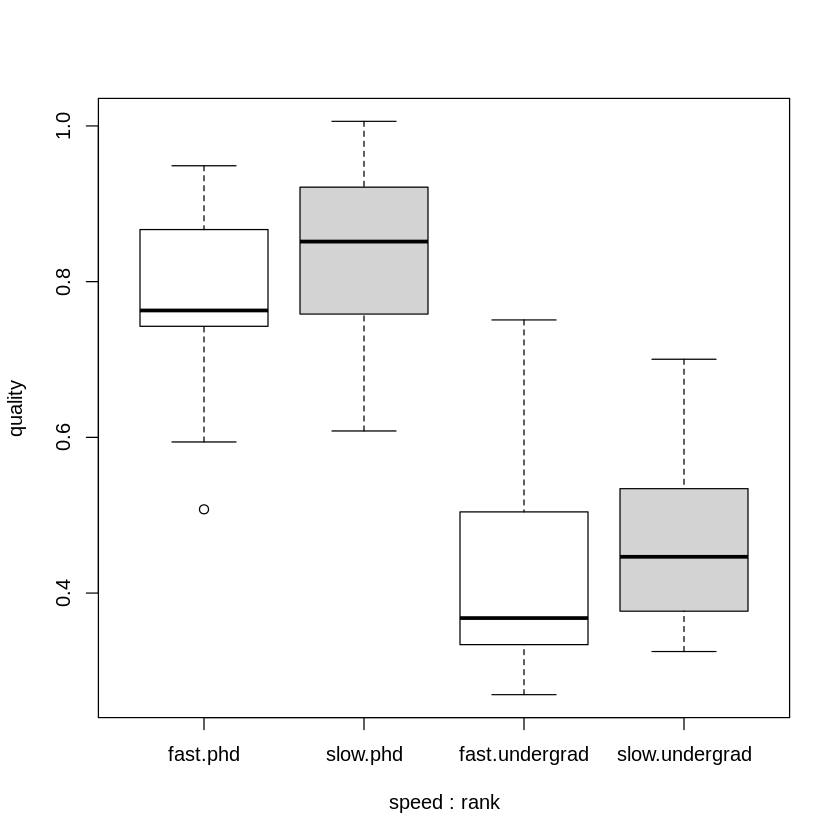

In [23]:
#First plot of your data
boxplot(quality ~ speed*rank,
col=c("white","lightgray"),df_speed)

11.13. Let's use the lmer() function to construct a first model of quality as a funcion of speed (as fixed effect) and random intercepts for subjects and topics. We will name this model "speed_model".

In [24]:
speed_model = lmer(quality ~ speed + (1|subject) + (1|topic), data=df_speed)

In [25]:
summary(speed_model)

Linear mixed model fit by REML ['lmerMod']
Formula: quality ~ speed + (1 | subject) + (1 | topic)
   Data: df_speed

REML criterion at convergence: -131.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3758 -0.5096 -0.1128  0.5326  3.3215 

Random effects:
 Groups   Name        Variance Std.Dev.
 topic    (Intercept) 0.002377 0.04876 
 subject  (Intercept) 0.043318 0.20813 
 Residual             0.007289 0.08538 
Number of obs: 84, groups:  topic, 7; subject, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.60480    0.08794   6.878
speedslow    0.05326    0.01863   2.859

Correlation of Fixed Effects:
          (Intr)
speedslow -0.106

11.14. Let's intepret the output of the "Random effects":

*   The standard deviation column gives you the variability in quality due to topics and subjects. As we can see, topics has less variability than subjects, that is, there is more idiosincratic differences between subjects than between topics. Variance is the average squared deviations from the mean, while standard deviation is the square root of this number.
*  In the residual column we have the variability that is not due to either subjects or topics. That is, there's allways an error term “ε” that we not control for.

11.15. Let's interpret the output of the fixed effects:

*   The "speedslow" coefficient is the slope for the categorical effect of speed. The estimate 0.05326 means that to go from "fast" to "slow", we go up +0.05326 quality units. This means that quality is lower when writing fast than when writing at a slow pace.

*   Then, there’s a standard error associated with this slope, and a tvalue, which is simply the estimate divided by the standard error.

*   Note that the lmer() function (just like the lm() function) took whatever comes first in the alphabet to be the reference level. In our case, "fast" comes before "slow", so the slope represents the change in quality from "fast" to "slow". If the reference level were "slow", the only thing that would change would be the sign of the slope.

*   Now, let’s consider the intercept (0.60480). Remember, the intercept is the mean value of y (the response variable, quality) when x=0 (in our case, the categorical variable "speed", where the reference level is "fast").



11.16. Let's add rank as a fixed effect:

In [26]:
speed_model = lmer(quality ~ speed + rank + (1|subject) + (1|topic), data=df_speed)
summary(speed_model)

Linear mixed model fit by REML ['lmerMod']
Formula: quality ~ speed + rank + (1 | subject) + (1 | topic)
   Data: df_speed

REML criterion at convergence: -138.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3918 -0.5448 -0.0986  0.5001  3.3586 

Random effects:
 Groups   Name        Variance Std.Dev.
 topic    (Intercept) 0.002377 0.04876 
 subject  (Intercept) 0.006561 0.08100 
 Residual             0.007289 0.08538 
Number of obs: 84, groups:  topic, 7; subject, 6

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.78316    0.05279  14.835
speedslow      0.05326    0.01863   2.859
rankundergrad -0.35671    0.06871  -5.192

Correlation of Fixed Effects:
            (Intr) spdslw
speedslow   -0.176       
rankundrgrd -0.651  0.000

Two considerations:

* Interestingly, when compared to our earlier model without the fixed effect rank, the variation that’s associated with the random effect “subject” has dropped considerably (from 0.20813 SD to 0.08100 SD). This is because the variation that’s due to rank was confounded with the variation that’s due to subject. The model didn’t know about PhDs and undergraduates, and so its predictions were relatively more off, creating relatively larger residuals. Now that we have added the effect of rank, we have shifted a considerable amount of the variance that was previously in the random effects component (i.e. differences between PhDs and undergrads) to the fixed effects component.

* The intercept is now 0.78316. This intercept is now
much higher, as it now represents the mean quality for the phd category (in the fast condition, though).

11.17. Significance testing in mixed models is not as easy as in linear models. One way to compare models is to use  Likelihood Ratio Test.



11.18. Likelihood is the probability of seeing the data you collected given your model. The logic of the likelihood ratio test is to compare the likelihood of two models
with each other. First, the model without the factor that you’re interested in (the null model), then the model with the factor that you’re interested in:

In [27]:
# We construct the null model (in the current case this will be a model with
# "rank" and random intercepts for subject and topic only)
speed_null = lmer(quality ~ rank + (1|subject) + (1|topic), data=df_speed, REML=FALSE)
summary(speed_null)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: quality ~ rank + (1 | subject) + (1 | topic)
   Data: df_speed

     AIC      BIC   logLik deviance df.resid 
  -135.1   -122.9     72.5   -145.1       79 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.51173 -0.58615 -0.08114  0.58129  2.92213 

Random effects:
 Groups   Name        Variance Std.Dev.
 topic    (Intercept) 0.002149 0.04635 
 subject  (Intercept) 0.004371 0.06612 
 Residual             0.008025 0.08958 
Number of obs: 84, groups:  topic, 7; subject, 6

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.80979    0.04422  18.314
rankundergrad -0.35671    0.05741  -6.213

Correlation of Fixed Effects:
            (Intr)
rankundrgrd -0.649

In [28]:
#We construct the model by adding the variable of interest "speed"
speed_model = lmer(quality ~ speed + rank + (1|subject) + (1|topic), data=df_speed, REML=FALSE)
summary(speed_model)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: quality ~ speed + rank + (1 | subject) + (1 | topic)
   Data: df_speed

     AIC      BIC   logLik deviance df.resid 
  -140.9   -126.3     76.4   -152.9       78 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4077 -0.5572 -0.0869  0.5025  3.3895 

Random effects:
 Groups   Name        Variance Std.Dev.
 topic    (Intercept) 0.002219 0.04711 
 subject  (Intercept) 0.004436 0.06660 
 Residual             0.007195 0.08483 
Number of obs: 84, groups:  topic, 7; subject, 6

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.78316    0.04531  17.286
speedslow      0.05326    0.01851   2.877
rankundergrad -0.35671    0.05745  -6.210

Correlation of Fixed Effects:
            (Intr) spdslw
speedslow   -0.204       
rankundrgrd -0.634  0.000

11.19. Now you have two models to compare with each other – one with the effect in question, one without the effect in question. We perform the likelihood ratio test using the anova() function:

In [29]:
anova(speed_null, speed_model)

npar AIC       BIC       logLik   deviance  Chisq    Df Pr(>Chisq) 
speed_null  5    -135.0629 -122.9088 72.53144 -145.0629       NA NA          NA
speed_model 6    -140.8993 -126.3144 76.44966 -152.8993 7.836445  1 0.005120321

11.20. You can report something like this: "We model the continuous dependent measure "Quality" as a function of particular fixed effects of speed and rank. We included random intercept per subject and topic. Likelihood ratio testing confirms this model performs better than the null model with rank and random effects only. Speed affected quality (χ2(1)=7.836, p < 0.01), lowering it by
about 0.053 quality units ± 0.019 (standard errors)."

Remember that the p-value is just the probability of obtaining sample results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct (in our case, the null hypothesis is that the speed_null and the speed_model quality distributions have equal means). In our case, since that probability is quite low, we reject the null hypothesis of equal means.

11.21. You can also explore whether there is an interaction between your fixed effects. An interaction occurs when an independent variable has a different effect on the outcome depending on the values of another independent variable. For example, in our case, it could be that writting fast versus slowly has the opposite effect for PhDs and undergrads. To explore this we can build another model with an interaction term. In R, we will do this as follows:

In [30]:
#We construct the model by adding an interaction between speed and rank
speed_interaction = lmer(quality ~ speed*rank + (1|subject) + (1|topic), data=df_speed, REML=FALSE)
summary(speed_interaction)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: quality ~ speed * rank + (1 | subject) + (1 | topic)
   Data: df_speed

     AIC      BIC   logLik deviance df.resid 
  -139.3   -122.3     76.7   -153.3       77 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4847 -0.5377 -0.0308  0.5171  3.3283 

Random effects:
 Groups   Name        Variance Std.Dev.
 topic    (Intercept) 0.002223 0.04715 
 subject  (Intercept) 0.004439 0.06663 
 Residual             0.007154 0.08458 
Number of obs: 84, groups:  topic, 7; subject, 6

Fixed effects:
                        Estimate Std. Error t value
(Intercept)              0.77719    0.04624  16.808
speedslow                0.06520    0.02610   2.498
rankundergrad           -0.34478    0.06034  -5.714
speedslow:rankundergrad -0.02387    0.03691  -0.647

Correlation of Fixed Effects:
            (Intr) spdslw rnkndr
speedslow   -0.282              
rankundrgrd -0.652  0.216       
spdslw:rnkn  0.200 -0.707 -0.306

11.22. And now we can proceed to the comparison between the model with and without interaction:

In [31]:
anova(speed_model, speed_interaction)

npar AIC       BIC       logLik   deviance  Chisq     Df
speed_model       6    -140.8993 -126.3144 76.44966 -152.8993        NA NA
speed_interaction 7    -139.3163 -122.3006 76.65816 -153.3163 0.4170098  1
                  Pr(>Chisq)
speed_model              NA 
speed_interaction 0.5184329

11.23. When we compare the above models in a likelihood ratio test using the anova() function, we get a p-value that gives us the significance of the interaction. If this comparison yields a very low p-value, you know that rank and speed might be inter-dependent on each other. If the p-value is high, there is no significant inter-dependence, that is, the pobability of very similar quality means for both models is high. In our case, there's no significant interdependence.

11.24. Random slopes. However, so far, the random effects that we have implemented into the model account for baseline-differences in quality only. That is, we have assumed that whatever the effects of speed and rank are, it’s going to be the same for all subjects and topics. Look at the coefficients of our speed_model:



In [32]:
coef(speed_model)

$topic
  (Intercept)  speedslow rankundergrad
1   0.7401056 0.05326308    -0.3567135
2   0.8046807 0.05326308    -0.3567135
3   0.8201899 0.05326308    -0.3567135
4   0.8498316 0.05326308    -0.3567135
5   0.7772976 0.05326308    -0.3567135
6   0.7418479 0.05326308    -0.3567135
7   0.7481506 0.05326308    -0.3567135

$subject
     (Intercept)  speedslow rankundergrad
phd1   0.7392306 0.05326308    -0.3567135
phd2   0.8160662 0.05326308    -0.3567135
phd3   0.7941762 0.05326308    -0.3567135
und3   0.8736282 0.05326308    -0.3567135
und4   0.7984926 0.05326308    -0.3567135
und7   0.6773522 0.05326308    -0.3567135

attr(,"class")
[1] "coef.mer"

11.25. If we expect that the effect of speed might be different for different subjects and topics, then we need to add random slopes, where subjects and topics are not only allowed to have differing intercepts, but where they are also allowed to have different slopes for the effect of quaality.

In [33]:
# We construct the model by adding the fixed effects "speed" and "rank"
# and random intercepts and slopes for subject and topic to the main factor in question, which is speed.
speed_model = lmer(quality ~ speed + rank + (1+speed|subject) + (1+speed|topic), data=df_speed, REML=FALSE)
summary(speed_model)

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: quality ~ speed + rank + (1 + speed | subject) + (1 + speed |  
    topic)
   Data: df_speed

     AIC      BIC   logLik deviance df.resid 
  -133.0   -108.7     76.5   -153.0       74 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3968 -0.5597 -0.0752  0.5141  3.4025 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr 
 topic    (Intercept) 2.062e-03 0.045413      
          speedslow   1.124e-05 0.003353 1.00 
 subject  (Intercept) 4.716e-03 0.068675      
          speedslow   1.704e-05 0.004129 -1.00
 Residual             7.186e-03 0.084770      
Number of obs: 84, groups:  topic, 7; subject, 6

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.78474    0.04551  17.245
speedslow      0.05326    0.01862   2.861
rankundergrad -0.35988    0.05724  -6.288

Correlation of Fixed Effects:
            (Intr) spdslw
speedslow   -0.232       
rankundrgrd -0.629  0.000
opti

11.25. Let's have a look at the coefficients of our new speed_model with random intercepts and slopes, and verify that we have now not only different intercepts, but also different by-subject and by-topic coefficients. That is, we are now accounting for different effects of speed for each subject and topic.

In [34]:
coef(speed_model)

$topic
  (Intercept)  speedslow rankundergrad
1   0.7429725 0.05017899    -0.3598847
2   0.8045221 0.05472342    -0.3598847
3   0.8215207 0.05597848    -0.3598847
4   0.8489020 0.05800014    -0.3598847
5   0.7790196 0.05284048    -0.3598847
6   0.7453767 0.05035650    -0.3598847
7   0.7508893 0.05076352    -0.3598847

$subject
     (Intercept)  speedslow rankundergrad
phd1   0.7374010 0.05610914    -0.3598847
phd2   0.8168362 0.05133375    -0.3598847
phd3   0.7950884 0.05264116    -0.3598847
und3   0.8793974 0.04757278    -0.3598847
und4   0.8024970 0.05219578    -0.3598847
und7   0.6772397 0.05972584    -0.3598847

attr(,"class")
[1] "coef.mer"

11.26. Now, in order to make a meaningfull comparison between models, let's construct our null model, without the main fixed effect in question but also with random intercepts and random slopes.

In [35]:
# We construct the null model by adding the fixed effect "rank"
# and random intercepts and slopes for subject and topic to the main factor in question, which is speed.
speed_null = lmer(quality ~ rank + (1+speed|subject) + (1+speed|topic), data=df_speed, REML=FALSE)
summary(speed_null)

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: quality ~ rank + (1 + speed | subject) + (1 + speed | topic)
   Data: df_speed

     AIC      BIC   logLik deviance df.resid 
  -128.8   -106.9     73.4   -146.8       75 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.46324 -0.60017 -0.08367  0.63592  3.00887 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr 
 topic    (Intercept) 2.392e-03 0.048912      
          speedslow   2.213e-03 0.047048 -0.32
 subject  (Intercept) 4.965e-03 0.070463      
          speedslow   5.221e-05 0.007225 -1.00
 Residual             7.352e-03 0.085741      
Number of obs: 84, groups:  topic, 7; subject, 6

Fixed effects:
              Estimate Std. Error t value
(Intercept)    0.81454    0.04430  18.387
rankundergrad -0.36207    0.05707  -6.344

Correlation of Fixed Effects:
            (Intr)
rankundrgrd -0.644
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingul

11.27. Finally, we compare our models using the likelihood ratio test:

In [36]:
anova(speed_null, speed_model)

npar AIC       BIC       logLik   deviance  Chisq    Df Pr(>Chisq)
speed_null   9   -128.8118 -106.9345 73.40592 -146.8118       NA NA         NA
speed_model 10   -132.9766 -108.6684 76.48830 -152.9766 6.164772  1 0.01303191

11.28. Again, we find that it would be extremely unlikely that, assuming the two models had the same means for quality, we would obtain results like the ones we are observing. Therefore, we conclude that speed has an effect on quality, reducing it.

### References:

* Camilo Mora, The least squares line. https://camilo-mora.github.io/GEO380/the-least-squares-line.html
* Bodo Winter. Winter, B. (2019). Statistics for linguists: An introduction using R. Routledge.
* Bodo Winter. Linear	models	and	linear	mixed	effects	models	in	R:	Tutorial	1-. https://bodowinter.com/tutorial/bw_LME_tutorial1.pdf
* Bodo Winter. A very basic tutorial for performing linear mixed effects analyses
(Tutorial 2). https://bodowinter.com/tutorial/bw_LME_tutorial2.pdf
* Steve Midway, Data analysis with R. https://bookdown.org/steve_midway/DAR/random-effects.html